In [1]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import os
import tensorflow as tf

2025-07-08 11:08:26.259702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751998106.274092  617429 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751998106.278414  617429 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751998106.290671  617429 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751998106.290686  617429 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751998106.290688  617429 computation_placer.cc:177] computation placer alr

In [2]:
# minorized reference
with h5py.File('/global/u2/k/kberard/SCGSR/Research/Diamond/Data/density_tot_ref.h5', 'r') as file:
    #print("Keys: %s" % file.keys())
    ref_d = file['density'][:]
#print(ref_d)
print(ref_d.shape)
minorized_ref_d = (np.sum(ref_d,axis=2))
minorized_ref_d.shape



(64, 64, 64)


(64, 64)

In [3]:
####################################################################################################################################################
def stochastic_density(d,N):
    # poisson model
    #  accurate and fast for all values of N
    # N  = number of MC samples
    assert isinstance(d,np.ndarray)
    assert isinstance(N,(int,float,np.int64,np.float64))
    assert N>0
    ds = np.random.poisson(N*d)/N
    ds*= d.sum()/ds.sum()
    return ds
#end def stochastic_density

####################################################################################################################################################

In [11]:
"""print(ref_d.shape)
y_train_3d = np.zeros((5000,64,64,64))
for i in range (len(y_train_3d)):
    y_train_3d[i] =  stochastic_density(ref_d,4770000)
y_train = (np.sum(y_train_3d,axis=2))"""

"""x_train_3d = np.zeros((5000,64,64,64))
for i in range (int(len(x_train_3d)/5)):
    for j in range (5):     
        x_train_3d[i*(j+1)] =  stochastic_density(ref_d,10000*(j+1))
x_train = (np.sum(x_train_3d,axis=2))

print("train generated")"""

(64, 64, 64)
train generated


In [12]:
"""print(ref_d.shape)
y_val_3d = np.zeros((1000,64,64,64))
for i in range (len(y_val_3d)):
    y_val_3d[i] =  stochastic_density(ref_d,4770000)
y_val = (np.sum(y_val_3d,axis=2))"""

"""x_val_3d = np.zeros((1000,64,64,64))
for i in range (int(len(x_val_3d)/5)):
    for j in range (5):     
        x_val_3d[i*(j+1)] =  stochastic_density(ref_d,10000*(j+1))
x_val = (np.sum(x_val_3d,axis=2))
print("val generated")"""

(64, 64, 64)
val generated


In [13]:
#################  add more diverse set of training data and fix overfilling!!!!!!!!!!

In [14]:
"""print(ref_d.shape)
y_test_3d = np.zeros((500,64,64,64))
for i in range (len(y_test_3d)):
    y_test_3d[i] =  stochastic_density(ref_d,4770000)
y_test = (np.sum(y_test_3d,axis=2))
x_test_3d = np.zeros((500,64,64,64))
for i in range (int(len(x_test_3d)/5)):
    x_test_3d[i] =  stochastic_density(ref_d,10000*5)
x_test = (np.sum(x_test_3d,axis=2))
print("test generated")"""


(64, 64, 64)
test generated


In [6]:
def generate_single_2d_density(ref_d, noise_level):
    noisy_3d = stochastic_density(ref_d, noise_level)  # shape: (64, 64, 64)
    projected_2d = np.sum(noisy_3d, axis=2)             # shape: (64, 64)
    return projected_2d

# Noise levels to randomly draw from
noise_levels = [10000 * (j + 1) for j in range(5)]  # [10000, 20000, ..., 50000]

# Sizes
num_train = 5000
num_val = 1000
num_test = 500

# Generate train set with mixed noise levels
x_train = np.zeros((num_train, 64, 64))
for i in range(num_train):
    noise_level = np.random.choice(noise_levels)
    x_train[i] = generate_single_2d_density(ref_d, noise_level)

# Generate val set with mixed noise levels
x_val = np.zeros((num_val, 64, 64))
for i in range(num_val):
    noise_level = np.random.choice(noise_levels)
    x_val[i] = generate_single_2d_density(ref_d, noise_level)



print("Train, val, generated")


Train, val, test generated


In [22]:
# Generate test set with fixed noise level
x_test = np.zeros((num_test, 64, 64))
for i in range(num_test):
    x_test[i] = generate_single_2d_density(ref_d, 100000)
print("test generated")

test generated


In [7]:
print("here")

here


In [15]:
################## Test what number of samples #####################
"""y_tvt = stochastic_density(ref_d,4770000)
print(y_tvt.shape)
print("target error is =",np.linalg.norm(ref_d-tot_VMC_d[1]))
print("current error is =",np.linalg.norm(ref_d-y_tvt[1]))"""

'y_tvt = stochastic_density(ref_d,4770000)\nprint(y_tvt.shape)\nprint("target error is =",np.linalg.norm(ref_d-tot_VMC_d[1]))\nprint("current error is =",np.linalg.norm(ref_d-y_tvt[1]))'

In [8]:
y_test_3d = np.zeros((x_test.shape[0],64,64,64))
y_train_3d = np.zeros((x_train.shape[0],64,64,64))
y_val_3d = np.zeros((x_val.shape[0],64,64,64))
for i in range (y_test_3d.shape[0]):
    y_test_3d[i]=stochastic_density(ref_d,1000000)
y_test = (np.sum(y_test_3d,axis=2))

for i in range (y_train_3d.shape[0]):
    y_train_3d[i]=stochastic_density(ref_d,1000000)
y_train = (np.sum(y_train_3d,axis=2))

for i in range (y_val_3d.shape[0]):
    y_val_3d[i]=stochastic_density(ref_d,1000000)
y_val = (np.sum(y_val_3d,axis=2))
print("here")

here


In [9]:
print("here")

here


In [ ]:
"""y_test = np.zeros((x_test.shape))
y_train = np.zeros((x_train.shape))
y_val = np.zeros((x_val.shape))
for i in range (y_test.shape[0]):
    y_test[i]=minorized_ref_d

for i in range (y_train.shape[0]):
    y_train[i]=minorized_ref_d

for i in range (y_val.shape[0]):
    y_val[i]=minorized_ref_d"""

In [10]:
# Add channel dimension
x_train = x_train[..., np.newaxis]
x_val   = x_val[..., np.newaxis]
x_test  = x_test[..., np.newaxis]

y_train = y_train[..., np.newaxis]
y_val   = y_val[..., np.newaxis]
y_test   = y_test[..., np.newaxis]

In [11]:
import tensorflow as tf

def jensen_shannon_divergence_loss(y_true, y_pred):
    y_t = tf.cast(y_true, tf.float32)
    y_p = tf.cast(y_pred, tf.float32)

    y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
    y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])

    y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
    y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8

    m = 0.5 * (y_t + y_p)

    kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)
    kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)

    jsd = 0.5 * (kl_true + kl_pred)

    return tf.reduce_mean(jsd)


In [12]:
# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("2 norm difference")
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))


print("divergence difference")              
print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, minorized_ref_d.copy()))

# should be on the order of 1.4 10^-5

2 norm difference
Mean vs DFT 2 norm diff
0.0012566793618091403
divergence difference
JSD (bar{x_test},y_dft): tf.Tensor(1.5282716e-05, shape=(), dtype=float32)


2025-07-08 11:25:28.630070: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [21]:
###### code before serialze for save
"""import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt



# --- DAE Definition with Channel Dimension Support ---
def create_dae(input_shape):
    def renormalize(x):
        x_sum = tf.reduce_sum(x, axis=[1, 2, 3], keepdims=True)
        x = x / (x_sum + 1e-8) * 8.0
        return x
    flat_dim = np.prod(input_shape)
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten(),
        
        # Encoder
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        
        # Decoder
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(flat_dim, activation='sigmoid'),
        layers.Reshape(target_shape=input_shape),
        layers.Lambda(renormalize)
    ])
    return model

# --- Main Execution ---
if __name__ == '__main__':
    input_shape = (64, 64, 1)


    dae = create_dae(input_shape)
    # change loss to JS div
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    dae.compile(optimizer=custom_optimizer, loss=jensen_shannon_divergence_loss)

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    dae.fit(x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=100,
            batch_size=50,
            callbacks=[early_stop],
            verbose=1)

    # --- Predict and Evaluate ---
    i = 0
    denoised_norm = dae.predict(x_test[i:i+1])[0, ..., 0]
    denoised = denoised_norm
    noisy_input = x_test[i, ..., 0]
    true_clean = y_test

    # --- Plot ---
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(noisy_input, cmap='viridis')
    plt.title("Noisy Input")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised, cmap='viridis')
    plt.title("Denoised Output")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(true_clean[0,:,:,0], cmap='viridis')
    plt.title("Clean Target")
    plt.colorbar()

    plt.tight_layout()
    plt.show()"""


    
    

'import numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras import layers, models, callbacks\nimport matplotlib.pyplot as plt\n\n\n\n# --- DAE Definition with Channel Dimension Support ---\ndef create_dae(input_shape):\n    def renormalize(x):\n        x_sum = tf.reduce_sum(x, axis=[1, 2, 3], keepdims=True)\n        x = x / (x_sum + 1e-8) * 8.0\n        return x\n    flat_dim = np.prod(input_shape)\n    model = tf.keras.Sequential([\n        layers.Input(shape=input_shape),\n        layers.Flatten(),\n\n        # Encoder\n        layers.Dense(64, activation=\'relu\'),\n        layers.Dense(32, activation=\'relu\'),\n        layers.Dense(16, activation=\'relu\'),\n\n        # Decoder\n        layers.Dense(64, activation=\'relu\'),\n        layers.Dense(32, activation=\'relu\'),\n        layers.Dense(flat_dim, activation=\'sigmoid\'),\n        layers.Reshape(target_shape=input_shape),\n        layers.Lambda(renormalize)\n    ])\n    return model\n\n# --- Main Execution ---\nif __

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0480 - val_loss: 0.0473
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0460 - val_loss: 0.0327
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0214 - val_loss: 0.0023
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017 - val_loss: 6.4213e-04
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.2778e-04 - val_loss: 3.0524e-04
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6910e-04 - val_loss: 1.8999e-04
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7440e-04 - val_loss: 1.3859e-04
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3083e-04 - val_loss: 1.1239e-04
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0805e-04 - val_loss: 9.7422e-05
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.4704e-05 - val_loss: 8.7974e-05
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.6202e-05 - v

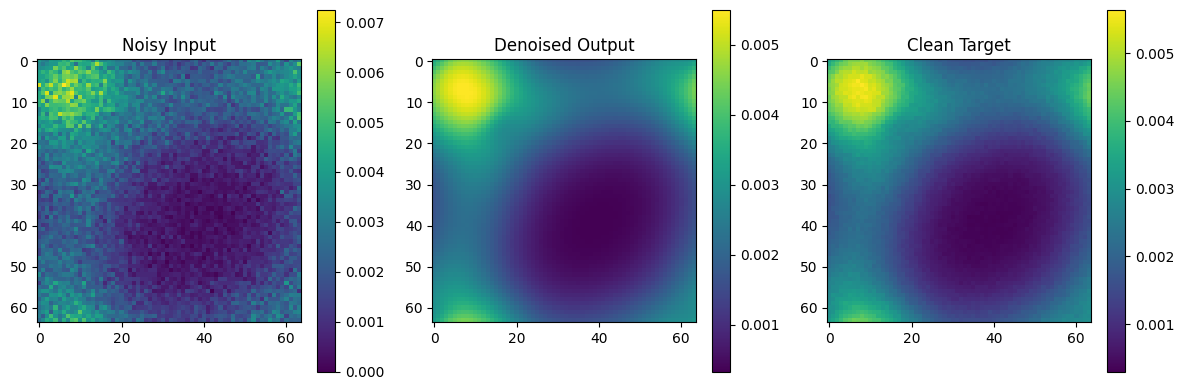

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
from tensorflow.keras.utils import register_keras_serializable


# --- Custom Renormalization Layer ---
@register_keras_serializable(package="Custom")
class Renormalize(tf.keras.layers.Layer):
    def __init__(self, target_sum=8.0, **kwargs):
        super().__init__(**kwargs)
        self.target_sum = target_sum

    def call(self, inputs):
        x_sum = tf.reduce_sum(inputs, axis=[1, 2, 3], keepdims=True)
        return inputs / (x_sum + 1e-8) * self.target_sum

    def get_config(self):
        config = super().get_config()
        config.update({'target_sum': self.target_sum})
        return config


# --- Custom JS Divergence Loss ---
@register_keras_serializable(package="Custom")


def jensen_shannon_divergence_loss(y_true, y_pred):
    y_t = tf.cast(y_true, tf.float32)
    y_p = tf.cast(y_pred, tf.float32)

    y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
    y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])

    y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
    y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8

    m = 0.5 * (y_t + y_p)

    kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)
    kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)

    jsd = 0.5 * (kl_true + kl_pred)

    return tf.reduce_mean(jsd)


# --- Create DAE Model ---
def create_dae(input_shape):
    flat_dim = np.prod(input_shape)
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(flat_dim, activation='sigmoid'),
        layers.Reshape(target_shape=input_shape),
        Renormalize(target_sum=8.0)  # Use the custom layer here
    ])
    return model


# --- Main ---
if __name__ == '__main__':
    input_shape = (64, 64, 1)

    dae = create_dae(input_shape)
    dae.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                loss=jensen_shannon_divergence_loss)

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    dae.fit(x_train.copy(), y_train.copy(),
            validation_data=(x_val.copy(), y_val.copy()),
            epochs=100,
            batch_size=50,
            callbacks=[early_stop],
            verbose=1)

    # --- Predict and Plot ---
    i = 0
    denoised_norm = dae.predict(x_test.copy()[i:i+1])[0, ..., 0]
    denoised = denoised_norm
    noisy_input = x_test.copy()[i, ..., 0]
    true_clean = y_test.copy()[i, ..., 0]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(noisy_input, cmap='viridis')
    plt.title("Noisy Input")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised, cmap='viridis')
    plt.title("Denoised Output")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(true_clean, cmap='viridis')
    plt.title("Clean Target")
    plt.colorbar()

    plt.tight_layout()
    plt.show()


In [29]:
 dae.save("DAE.keras")

In [25]:
# must beat the model predicting the average
test_avg = np.mean(x_test.copy()[:,:,:,0],axis=0)
print("2 norm difference")
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d.copy()))
print(test_avg.shape)
print(minorized_ref_d.shape)

print("divergence difference")              
print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, minorized_ref_d.copy()))

# should be on the order of 1.4 10^-5

2 norm difference
Mean vs DFT 2 norm diff
0.0004004801567415197
(64, 64)
(64, 64)
divergence difference
JSD (bar{x_test},y_dft): tf.Tensor(1.5027226e-06, shape=(), dtype=float32)


In [26]:
# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(x_test[0,:,:,0]-minorized_ref_d))
print(x_test[0,:,:,0].shape)
print(minorized_ref_d.shape)

Mean vs DFT 2 norm diff
0.0004004801567415197
prediction of one test sample vs DFT
0.009044218122939053
(64, 64)
(64, 64)


In [27]:
# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("2 norm difference")
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(dae.predict(x_test[0,:,:].reshape(1,64,64,1))[0,:,:,0]-minorized_ref_d))
print()

print("divergence difference")
mean_pred = dae.predict(np.mean(x_test.copy(),axis=0).reshape(1,64,64,1))                 
print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, minorized_ref_d.copy()))
print("JSD (DAE(bar{x}),y_dft):", jensen_shannon_divergence_loss(np.squeeze(mean_pred), minorized_ref_d.copy()))
print("JSD (DAE(_i}),y_dft):", jensen_shannon_divergence_loss(dae.predict(x_test[0,:,:].reshape(1,64,64,1))[0,:,:,0], minorized_ref_d.copy()))

print("average of test is worse than the pred of the average of x_test and single sample pred is a little worse than average")


2 norm difference
Mean vs DFT 2 norm diff
0.0004004801567415197
prediction of one test sample vs DFT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
0.00022392670495309305

divergence difference
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
JSD (bar{x_test},y_dft): tf.Tensor(1.5027226e-06, shape=(), dtype=float32)
JSD (DAE(bar{x}),y_dft): tf.Tensor(4.3374934e-07, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
JSD (DAE(_i}),y_dft): tf.Tensor(4.3456618e-07, shape=(), dtype=float32)
average of test is worse than the pred of the average of x_test and single sample pred is a little worse than average


In [18]:
print(x_test[0].shape)

(64, 64, 1)


In [35]:
"""#check the number of electrons
# need to ensure this is kept true throught taining
print("number of electron is should = 8",np.sum(denoised.sum(axis=1)))


import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt



def create_cae(input_shape, target_sum=8.0):
    input_layer = layers.Input(shape=input_shape)
    # Renormalize output to have a fixed sum (e.g., 8 electrons)
    def renormalize(x):
        x_sum = tf.reduce_sum(x, axis=[1, 2, 3], keepdims=True)
        return x / (x_sum + 1e-8) * target_sum
    # Encoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
    #x = layers.Lambda(renormalize)(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    #x = layers.Lambda(renormalize)(x)

    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    #x = layers.Lambda(renormalize)(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    #x = layers.Lambda(renormalize)(x)
    x = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)  # use relu to ensure non-negativity



    output_layer = layers.Lambda(renormalize)(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# --- Main ---
if __name__ == '__main__':
    input_shape = (64, 64, 1)  # CAE expects 4D shape with channel

    # Create model
    cae = create_cae(input_shape)
    cae.compile(optimizer='adam', loss=jensen_shannon_divergence_loss)



    # --- Early stopping ---
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # --- Train ---
    cae.fit(x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=10,
            batch_size=20,
            callbacks=[early_stop],
            verbose=1)

    # --- Predict and plot ---
    i = 0  # test sample index
    denoised_norm = cae.predict(x_test[i:i+1])[0, ..., 0]
    denoised = denoised_norm

    # --- Plot ---
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(x_test[i, ..., 0], cmap='viridis')
    plt.title("Noisy Input")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised, cmap='viridis')
    plt.title("Denoised Output")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(y_test[0], cmap='viridis')
    plt.title("Clean Target")
    plt.colorbar()

    plt.tight_layout()
    plt.show()"""


'#check the number of electrons\n# need to ensure this is kept true throught taining\nprint("number of electron is should = 8",np.sum(denoised.sum(axis=1)))\n\n\nimport numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras import layers, models, callbacks\nimport matplotlib.pyplot as plt\n\n\n\ndef create_cae(input_shape, target_sum=8.0):\n    input_layer = layers.Input(shape=input_shape)\n    # Renormalize output to have a fixed sum (e.g., 8 electrons)\n    def renormalize(x):\n        x_sum = tf.reduce_sum(x, axis=[1, 2, 3], keepdims=True)\n        return x / (x_sum + 1e-8) * target_sum\n    # Encoder\n    x = layers.Conv2D(16, (3, 3), activation=\'relu\', padding=\'same\')(input_layer)\n    #x = layers.Lambda(renormalize)(x)\n    x = layers.Conv2D(8, (3, 3), activation=\'relu\', padding=\'same\')(x)\n    #x = layers.Lambda(renormalize)(x)\n\n    # Decoder\n    x = layers.Conv2D(8, (3, 3), activation=\'relu\', padding=\'same\')(x)\n    #x = layers.Lambda(renormalize)(x)\n    x 


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - loss: 0.0303 - val_loss: 6.4411e-04 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 4.8685e-04 - val_loss: 2.9455e-04 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - loss: 2.7637e-04 - val_loss: 3.0286e-04 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - loss: 2.5991e-04 - val_loss: 2.1949e-04 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 2.2877e-04 - val_loss: 2.3713e-04 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
157

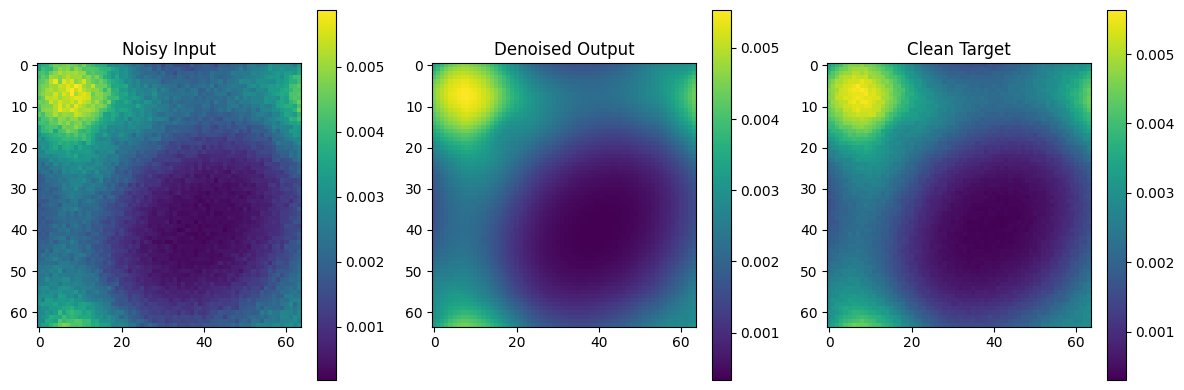

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import register_keras_serializable
import matplotlib.pyplot as plt

# === Custom Layer ===
@register_keras_serializable()
class Renormalize(layers.Layer):
    def __init__(self, target_sum=8.0, **kwargs):
        super().__init__(**kwargs)
        self.target_sum = target_sum

    def call(self, inputs):
        x_sum = tf.reduce_sum(inputs, axis=[1, 2, 3], keepdims=True)
        return inputs / (x_sum + 1e-8) * self.target_sum

    def get_config(self):
        config = super().get_config()
        config.update({'target_sum': self.target_sum})
        return config

# === Custom Loss ===
@register_keras_serializable()
def jensen_shannon_divergence_loss(y_true, y_pred):
    y_t = tf.cast(y_true, tf.float32)
    y_p = tf.cast(y_pred, tf.float32)

    y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
    y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])

    y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
    y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8

    m = 0.5 * (y_t + y_p)

    kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)
    kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)

    jsd = 0.5 * (kl_true + kl_pred)

    return tf.reduce_mean(jsd)




# === Model Builder ===
def create_cae(input_shape, target_sum=8.0):
    input_layer = layers.Input(shape=input_shape)

    # Encoder with downsampling
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Bottleneck
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)

    # Decoder with upsampling
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Changed to sigmoid

    # Normalize to target sum
    output_layer = Renormalize(target_sum=target_sum)(x)

    return models.Model(inputs=input_layer, outputs=output_layer)

# Learning rate schedule
lr_schedule = callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * (0.5 ** (epoch // 10)),  # Halve LR every 10 epochs
    verbose=1
)

# === Main Execution ===
if __name__ == '__main__':
    input_shape = (64, 64, 1)


    cae = create_cae(input_shape)

    cae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=jensen_shannon_divergence_loss)

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = cae.fit(x_train, y_train,
                  validation_data=(x_val, y_val),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop, lr_schedule],
                  shuffle=True,
                  verbose=1)


    cae.save("CAE.keras")

    # Predict and plot
    i = 0
    denoised = cae.predict(x_test[i:i+1])[0, ..., 0]

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(x_test[i, ..., 0], cmap='viridis')
    plt.title("Noisy Input")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised, cmap='viridis')
    plt.title("Denoised Output")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(y_test[i, ..., 0], cmap='viridis')
    plt.title("Clean Target")
    plt.colorbar()

    plt.tight_layout()
    plt.show()


In [35]:
cae.save("CAE.keras")

In [36]:


# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("2 norm difference")
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(cae.predict(x_test[0,:,:].reshape(1,64,64,1))[0,:,:,0]-minorized_ref_d))
print()

print("divergence difference")
mean_pred = cae.predict(np.mean(x_test.copy(),axis=0).reshape(1,64,64,1))                 
print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, minorized_ref_d.copy()))
print("JSD (CAE(bar{x}),y_dft):", jensen_shannon_divergence_loss(np.squeeze(mean_pred), minorized_ref_d.copy()))
print("JSD (CAE(_i}),y_dft):", jensen_shannon_divergence_loss(cae.predict(x_test[0,:,:].reshape(1,64,64,1))[0,:,:,0], minorized_ref_d.copy()))


print("not working bettterrr!!!!!!!!")

2 norm difference
Mean vs DFT 2 norm diff
0.0004004801567415197
prediction of one test sample vs DFT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
0.001462748550434674

divergence difference
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
JSD (bar{x_test},y_dft): tf.Tensor(1.5027226e-06, shape=(), dtype=float32)
JSD (CAE(bar{x}),y_dft): tf.Tensor(1.1741493e-05, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
JSD (CAE(_i}),y_dft): tf.Tensor(1.6102898e-05, shape=(), dtype=float32)
not working bettterrr!!!!!!!!


In [42]:
a = .32
x_m = np.squeeze(np.mean(x_test.copy(),axis=0))
print(x_m.shape)
print(minorized_ref_d.shape)
print("mean:", jensen_shannon_divergence_loss(a*x_m+(1-a)*minorized_ref_d, minorized_ref_d.copy()))
#print("mean:", jensen_shannon_divergence_loss((1-a)*np.mean(x_test.copy(),axis=0)+a*y_dft[0].copy(), y_dft[0].copy()))
print(1/a**2)


(64, 64)
(64, 64)
mean: tf.Tensor(1.1130109e-07, shape=(), dtype=float32)
9.765625


In [41]:
#check the number of electrons
# need to ensure this is kept true throught taining
print("number of electron is should = 8",np.sum(denoised.sum(axis=1)))


number of electron is should = 8 8.0
